# import libraries

In [ ]:
%pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install nltk
%matplotlib inline

In [ ]:
import nltk
#nltk.download()

import pandas as pd
from pandas.core.arrays.sparse import dtype
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

import string
import re

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import random
from bs4 import BeautifulSoup

In [ ]:
from sklearn import model_selection
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Box

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import linear_model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

# df info

In [ ]:
df = pd.read_csv("master_data2.csv")

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Title,Post Text,ID,Score,Upvote Ratio,Total Comments,Created On,Post URL,Original Content,Saved,subreddit
0,0,0,How I cured my adhd permanently,"I've been suffering from adhd my whole life, f...",pelip6,12808,0.98,891,2021-08-30 16:25:28,https://www.reddit.com/r/ADHD/comments/pelip6/...,False,False,adhd
1,1,1,It's so damn irritating to be intelligent with...,So I've always been told I'm smart by people w...,kre725,9295,0.99,670,2021-01-06 02:29:30,https://www.reddit.com/r/ADHD/comments/kre725/...,False,False,adhd
2,2,2,My nine-year-old just captured the ADHD experi...,"""How did you go with your spelling test today?...",11mane9,8998,0.99,610,2023-03-08 22:41:53,https://www.reddit.com/r/ADHD/comments/11mane9...,False,False,adhd
3,3,3,My ADHD girlfriend has a funny way of doing th...,"All day today, I've been working in my home of...",nn8ogl,8943,1.00,367,2021-05-28 21:53:41,https://www.reddit.com/r/ADHD/comments/nn8ogl/...,False,False,adhd
4,4,4,Shoot.. it's 6pm which is close to 8pm which i...,So I'll just wake up early tomorrow and do wha...,lxoy5d,8842,1.00,270,2021-03-04 16:42:07,https://www.reddit.com/r/ADHD/comments/lxoy5d/...,False,False,adhd


In [ ]:
df.count()

Unnamed: 0.1        3813
Unnamed: 0          3813
Title               3813
Post Text           3277
ID                  3813
Score               3813
Upvote Ratio        3813
Total Comments      3813
Created On          3813
Post URL            3813
Original Content    3813
Saved               3813
subreddit           3813
dtype: int64

In [ ]:
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Title                object
Post Text            object
ID                   object
Score                 int64
Upvote Ratio        float64
Total Comments        int64
Created On           object
Post URL             object
Original Content       bool
Saved                  bool
subreddit            object
dtype: object

In [ ]:
df['Upvote Ratio'] = df['Upvote Ratio'].astype('int64')
df['Score'] = df['Score'].astype('int64')
df['Upvote Ratio'] = df['Upvote Ratio'].astype('int64')

In [ ]:
df.isnull().sum()

Unnamed: 0.1          0
Unnamed: 0            0
Title                 0
Post Text           536
ID                    0
Score                 0
Upvote Ratio          0
Total Comments        0
Created On            0
Post URL              0
Original Content      0
Saved                 0
subreddit             0
dtype: int64

In [ ]:
df["Post Text"].replace('[removed]', "", inplace = True)
df["Post Text"].replace('[deleted]', "", inplace = True)

In [ ]:
df['text'] = df['Title'] + " " + df["Post Text"]

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Title,Post Text,ID,Score,Upvote Ratio,Total Comments,Created On,Post URL,Original Content,Saved,subreddit,text
0,0,0,How I cured my adhd permanently,"I've been suffering from adhd my whole life, f...",pelip6,12808,0,891,2021-08-30 16:25:28,https://www.reddit.com/r/ADHD/comments/pelip6/...,False,False,adhd,How I cured my adhd permanently I've been suff...
1,1,1,It's so damn irritating to be intelligent with...,So I've always been told I'm smart by people w...,kre725,9295,0,670,2021-01-06 02:29:30,https://www.reddit.com/r/ADHD/comments/kre725/...,False,False,adhd,It's so damn irritating to be intelligent with...
2,2,2,My nine-year-old just captured the ADHD experi...,"""How did you go with your spelling test today?...",11mane9,8998,0,610,2023-03-08 22:41:53,https://www.reddit.com/r/ADHD/comments/11mane9...,False,False,adhd,My nine-year-old just captured the ADHD experi...
3,3,3,My ADHD girlfriend has a funny way of doing th...,"All day today, I've been working in my home of...",nn8ogl,8943,1,367,2021-05-28 21:53:41,https://www.reddit.com/r/ADHD/comments/nn8ogl/...,False,False,adhd,My ADHD girlfriend has a funny way of doing th...
4,4,4,Shoot.. it's 6pm which is close to 8pm which i...,So I'll just wake up early tomorrow and do wha...,lxoy5d,8842,1,270,2021-03-04 16:42:07,https://www.reddit.com/r/ADHD/comments/lxoy5d/...,False,False,adhd,Shoot.. it's 6pm which is close to 8pm which i...


# data cleaning & pre-processing

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (run only once)
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize

In [ ]:
# text cleaning

def clean_text(text):
    text = BeautifulSoup(text).get_text()
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()

    p_stemmer = PorterStemmer()
    tockenizer = RegexpTokenizer(r'\w+')
    text = [p_stemmer.stem[i] for i in tockenizer.tockenize(text)]
    return (" ",join(text))

In [ ]:
cleaned = [clean_text(text) for text in df['text']]

AttributeError: ignored

sentiment analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (run only once)
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
text = df[['Title']]

sentiment_scores = sid.polarity_scores(text)

AttributeError: ignored

In [ ]:
if sentiment_scores['compound'] >= 0.05:
    sentiment = "Positive"
elif sentiment_scores['compound'] <= -0.05:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

NameError: ignored

In [ ]:
print("Text:", text)
print("Sentiment:", sentiment)
print("Sentiment Scores:", sentiment_scores)

frequency

In [ ]:
df_lda = df[["text"]]

In [ ]:
df_lda['text'] = df_lda['text'].values

<ipython-input-27-b30cd527aa6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lda['text'] = df_lda['text'].values


In [ ]:
df_lda = df_lda.dropna()
df_lda = df_lda.reset_index(drop=True)

In [ ]:
df_lda['index'] = df_lda.index
documents = df_lda
documents

,text,index
0,How I cured my adhd permanently I've been suff...,0
1,It's so damn irritating to be intelligent with...,1
2,My nine-year-old just captured the ADHD experi...,2
3,My ADHD girlfriend has a funny way of doing th...,3
4,Shoot.. it's 6pm which is close to 8pm which i...,4
...,...,...
3272,Sleep is the BEST part of my day. Depression m...,3272
3273,(TW) Just got raped I (27m) am currently homel...,3273
3274,Locked myself up in a hotel to do it. Have 2 b...,3274
3275,Went to a psych ward last week After being adm...,3275


In [ ]:
res = [*documents['text'].apply(sid.polarity_scores)]
print(res[:3])

[{'neg': 0.146, 'neu': 0.762, 'pos': 0.092, 'compound': -0.8637}, {'neg': 0.137, 'neu': 0.697, 'pos': 0.165, 'compound': 0.5994}, {'neg': 0.039, 'neu': 0.913, 'pos': 0.048, 'compound': 0.5289}]


In [ ]:
sentiment_df = pd.DataFrame.from_records(res)
documents = pd.concat([documents, sentiment_df], axis=1, join='inner')
documents.head()

,text,index,neg,neu,pos,compound
0,How I cured my adhd permanently I've been suff...,0,0.146,0.762,0.092,-0.8637
1,It's so damn irritating to be intelligent with...,1,0.137,0.697,0.165,0.5994
2,My nine-year-old just captured the ADHD experi...,2,0.039,0.913,0.048,0.5289
3,My ADHD girlfriend has a funny way of doing th...,3,0.008,0.920,0.073,0.9432
4,Shoot.. it's 6pm which is close to 8pm which i...,4,0.087,0.913,0.000,-0.7891


In [ ]:
THRESHOLD = 0.2

conditions = [
    (documents['compound'] <= -THRESHOLD),
    (documents['compound'] > -THRESHOLD) & (documents['compound'] < THRESHOLD),
    (documents['compound'] >= THRESHOLD),
    ]

values = ["neg", "neu", "pos"]
documents['label'] = np.select(conditions, values)

documents.head()

,text,index,neg,neu,pos,compound,label
0,How I cured my adhd permanently I've been suff...,0,0.146,0.762,0.092,-0.8637,neg
1,It's so damn irritating to be intelligent with...,1,0.137,0.697,0.165,0.5994,pos
2,My nine-year-old just captured the ADHD experi...,2,0.039,0.913,0.048,0.5289,pos
3,My ADHD girlfriend has a funny way of doing th...,3,0.008,0.920,0.073,0.9432,pos
4,Shoot.. it's 6pm which is close to 8pm which i...,4,0.087,0.913,0.000,-0.7891,neg


In [ ]:
df_percent = documents[['label']]
# Percentage calculation
(df_percent['label'].value_counts()/df_percent['label'].count())*100

neg    53.463534
pos    41.257247
neu     5.279219
Name: label, dtype: float64

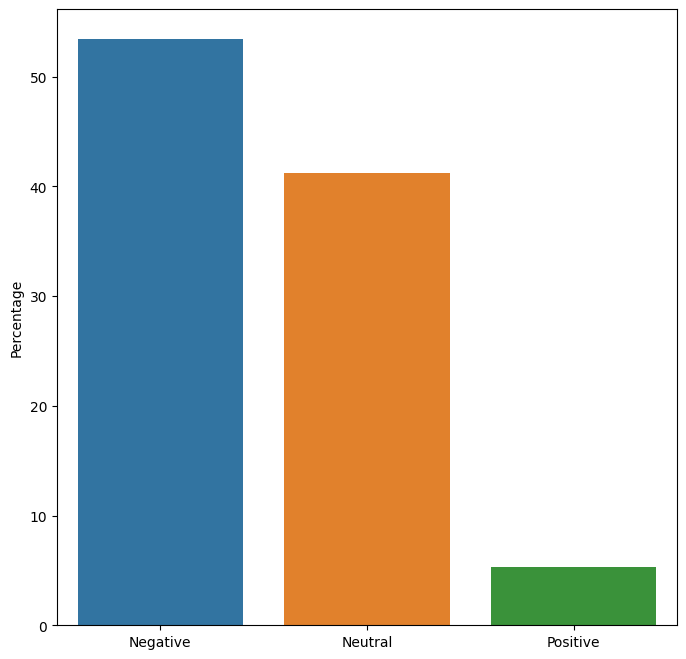

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = documents.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [ ]:
df_lda.info()

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters and numbers using regular expressions
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenize the text (split it into words)
    words = text.split()

    # Remove stopwords (common words that do not add much meaning)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming (reducing words to their root form)
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(words)
    return cleaned_text

In [ ]:
doc_sample = documents[documents['index'] == 4].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(clean(doc_sample))

NameError: ignored

In [ ]:
processed_docs = documents['text'].map(clean)
processed_docs